Coordinate closest to 7.70e+01: x = 200.0, y = -200.0
diff.min() 76.9144986016238


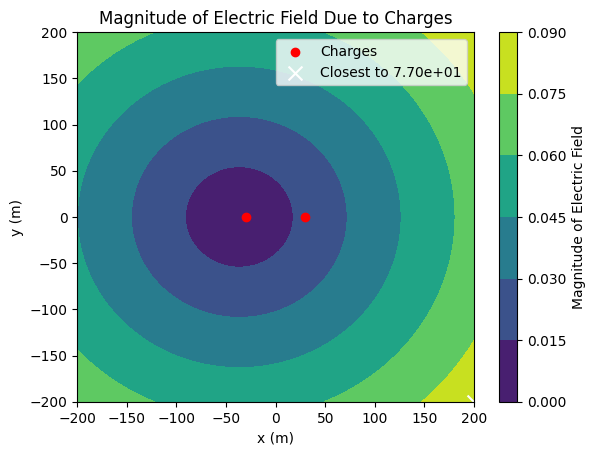

3999


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the electric field due to a point charge
def electric_field(q, r):
    epsilon_0 = 8.854187817e-12  # Vacuum permittivity in C^2/Nm^2
    r_mag = np.linalg.norm(r)
    r_hat = r / r_mag
    return (q / (4 * np.pi * epsilon_0)) * r_hat / r_mag**2

# Create a grid of points in the x-y plane
x = np.linspace(-200, 200, 4000)
y = np.linspace(-200, 200, 4000)
X, Y = np.meshgrid(x, y)

# Define elementary charge
e = 1 

# Define charges and positions
charges = [-10000*e, +1000*e]
positions = [(-30, 0), (30, 0)]

# Calculate the electric field due to each charge at each grid point
Ex_total = np.zeros(X.shape)
Ey_total = np.zeros(Y.shape)

for q, pos in zip(charges, positions):
    r = np.sqrt((X-pos[0])**2 + (Y-pos[1])**2)
    r_hat_x = (X-pos[0]) / r
    r_hat_y = (Y-pos[1]) / r

    E = electric_field(q, r)
    Ex_total += E * r_hat_x
    Ey_total += E * r_hat_y

# Calculate the magnitude
magnitude = np.sqrt(Ex_total**2 + Ey_total**2)

# Find location of magnitude closest to 77e^2
target_value = 77*e**2
diff = np.abs(magnitude - target_value)
i, j = np.unravel_index(diff.argmin(), diff.shape)

# Print the x-y coordinate
print(f"Coordinate closest to {target_value:.2e}: x = {X[i, j]}, y = {Y[i, j]}")
print("diff.min()", diff.min())

# Plot color-coded magnitude using filled contour plot
plt.contourf(X, Y, magnitude, cmap=cm.viridis)
plt.colorbar(label="Magnitude of Electric Field")

# Plot the charges
plt.scatter([pos[0] for pos in positions], [pos[1] for pos in positions], c='red', marker='o', label='Charges')

# Highlight the point closest to 77e^2
plt.scatter(X[i, j], Y[i, j], c='white', marker='x', s=100, label=f'Closest to {target_value:.2e}')

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Magnitude of Electric Field Due to Charges')
plt.legend()
plt.show()


print (diff.argmin())

In [29]:
i, j

(200, 233)